In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [42]:
measures = pd.read_csv("measures.csv")

# Summary stats

In [43]:
len(measures)

8634

In [44]:
measures

,tta_or_condition,d_condition,tta_condition,is_gap_accepted,RT,subj_id,dwell_time,decision
0,4,20,4,True,1.195,3,0.826087,Merge
1,4,20,4,True,1.175,3,0.739130,Merge
2,4,20,4,True,1.865,3,0.621622,Merge
3,4,20,4,True,0.923,3,1.000000,Merge
4,4,20,4,True,1.335,3,0.846154,Merge
...,...,...,...,...,...,...,...,...
8629,6,40,6,False,2.433,24,0.541667,Wait
8630,6,40,6,False,2.185,24,0.813953,Wait
8631,6,40,6,False,1.199,24,0.869565,Wait
8632,6,40,6,False,1.571,24,0.677419,Wait


<AxesSubplot:>

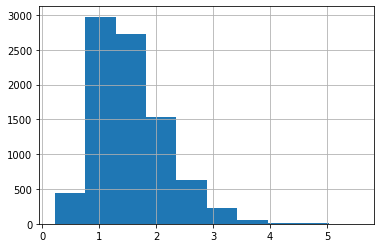

In [45]:
measures.RT.hist()

<AxesSubplot:>

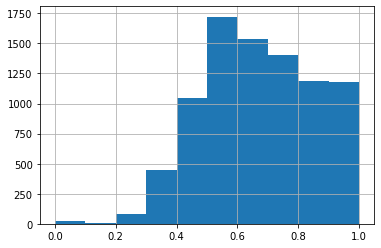

In [46]:
measures.dwell_time.hist()

In [50]:
measures.groupby("subj_id").is_gap_accepted.mean().sort_values()

subj_id
21    0.300000
5     0.352941
14    0.458333
24    0.461111
12    0.511111
16    0.538889
25    0.577778
17    0.584958
19    0.588889
9     0.666667
13    0.686111
11    0.697222
15    0.702778
10    0.711111
22    0.727778
26    0.727778
4     0.744444
3     0.758333
18    0.775000
7     0.797222
6     0.800000
8     0.805556
23    0.852778
20    0.935754
Name: is_gap_accepted, dtype: float64

# Gap effects on decision and RTs

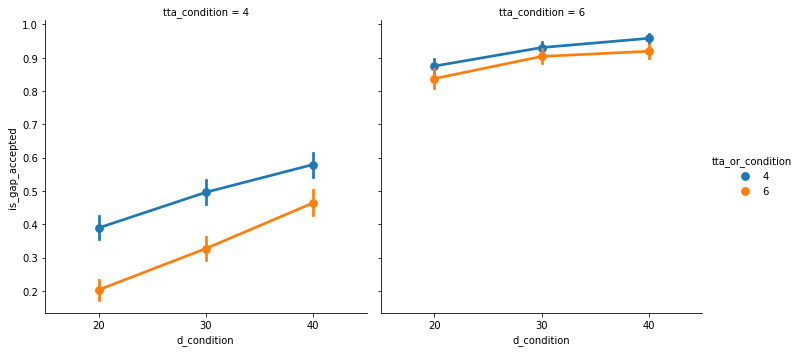

In [12]:
sns.catplot(data=measures, y="is_gap_accepted", x="d_condition", hue="tta_or_condition", col="tta_condition", kind="point")

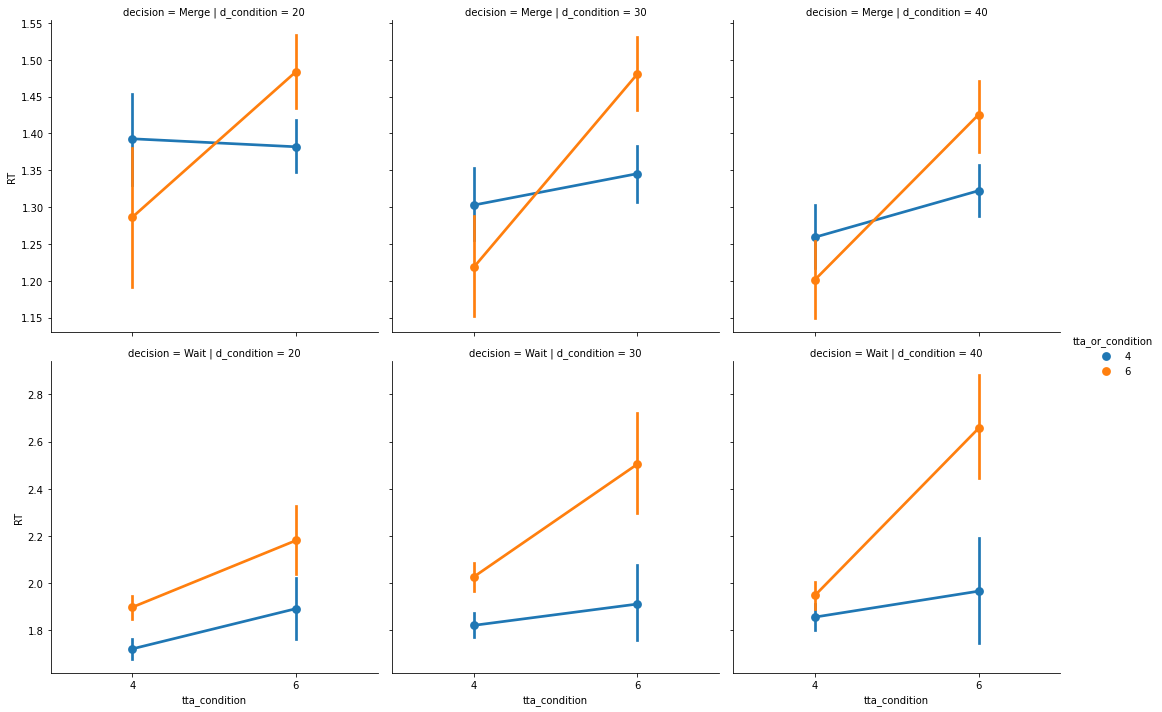

In [13]:
sns.catplot(data=measures, y="RT", col="d_condition", x="tta_condition", row="decision", hue="tta_or_condition", kind="point", sharey="row")

Conclusions
 - Distance and TTA increase p(accept): both are a part of the generalized gap
 - TTA_onramp decreases p(accept), especially for smaller TTA: negatively contributes to evidence in favor of merging
 - Merge decisions are much faster than Wait decisions (see different y-axes scales): look up how DDM accounts for this
 - Both Merge and Wait RTs decrease with decreasing TTA: in all distance/TTA_onramp conditions, 6s TTA decisions are slower than in 4s TTA.
 - Very strong interaction between TTA and TTA_onramp: decisions become much faster with decreasing TTA when there is no time pressure from the on-ramp (TTA_onramp=6s).
 - For Merge decisions, it's super interesting: decisions in TTA=4, TTA_onramp=4 are slower than TTA=4, TTA_onramp=6! How is that possible? In theory, 4,4 condition gives the highest time pressure, why is increasing TTA_onramp (that is, decreasing pressure) makes the Merge decisions even faster?
 - -- One possible explanation is related to different gaze patterns being potentially different
 - -- Another explanation could be related to interplay between evidence strength and time pressure
 - -- Evidence for Merge decision is weaker in 4,6 condition than in 4, 4 condition?
 - -- Time pressure is weaker in 4,6 condition than in 4, 4 condition

# Gaze effects

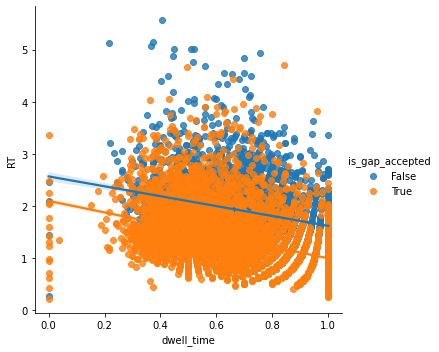

In [14]:
sns.lmplot(data=measures, x="dwell_time", y="RT", hue="is_gap_accepted")

## Gaze effect on decision

Overall effect is small-ish

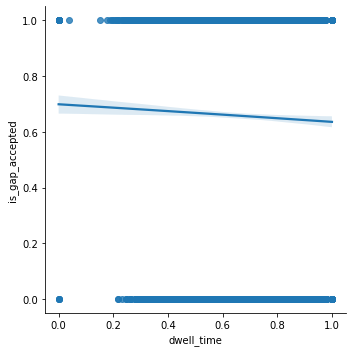

In [15]:
sns.lmplot(data=measures, x="dwell_time", y="is_gap_accepted", logistic=True)

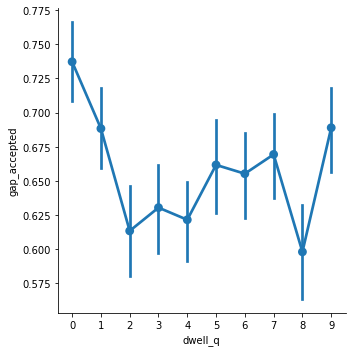

In [22]:
sns.catplot(data=measures, x="dwell_q", y="is_gap_accepted", kind="point")

However, depending on the condition, information in the mirror can represent evidence for or against the merge decision. So let's look at the same plots per condition.

In [20]:
measures.groupby(["d_condition", "tta_condition", "tta_or_condition"]).is_gap_accepted.mean().sort_values()

d_condition  tta_condition  tta_or_condition
20           4              6                   0.202778
30           4              6                   0.326843
20           4              4                   0.388889
40           4              6                   0.463788
30           4              4                   0.495833
40           4              4                   0.579167
20           6              6                   0.837274
                            4                   0.875000
30           6              6                   0.903900
40           6              6                   0.919444
30           6              4                   0.930556
40           6              4                   0.958333
Name: is_gap_accepted, dtype: float64

First, for conditions in which the drivers are unlikely to merge (**small gap**), the mirror contains information against the merge decision. Here we expect the probability of accepting the gap to **decrease** with dwell time to the mirror

C:\Users\azgonnikov\AppData\Local\Temp\ipykernel_8764\957419350.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["dwell_q"] = pd.qcut(data.dwell_time, 10, labels=False)


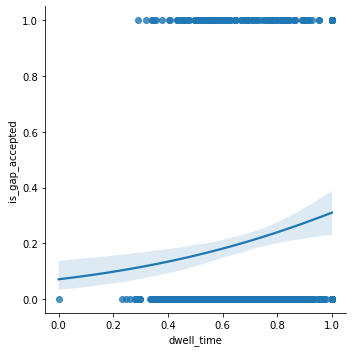

In [22]:
data = measures[(measures.d_condition==20)&(measures.tta_condition==4)&(measures.tta_or_condition==6)]
data["dwell_q"] = pd.qcut(data.dwell_time, 10, labels=False)
sns.lmplot(data=data, x="dwell_time", y="is_gap_accepted", logistic=True)

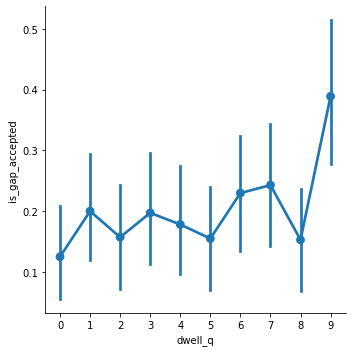

In [23]:
sns.catplot(data=data, x="dwell_q", y="is_gap_accepted", kind="point")

Second, for conditions in which the drivers are likely to merge (**gap is large**), the mirror contains information for the merge decision. In this case we expect the probability of accepting the gap to **increase** with dwell time

C:\Users\azgonnikov\AppData\Local\Temp\ipykernel_8764\3239129403.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["dwell_q"] = pd.qcut(data.dwell_time, 9, labels=False)


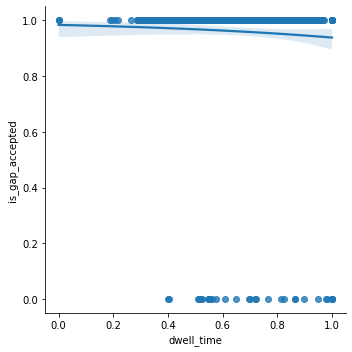

In [29]:
data = measures[(measures.d_condition==40)&(measures.tta_condition==6)&(measures.tta_or_condition==4)]
data["dwell_q"] = pd.qcut(data.dwell_time, 9, labels=False)
sns.lmplot(data=data, x="dwell_time", y="is_gap_accepted", logistic=True)

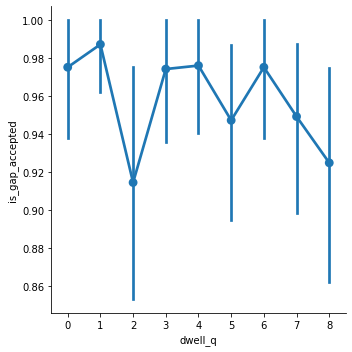

In [30]:
sns.catplot(data=data, x="dwell_q", y="is_gap_accepted", kind="point")

However, for clear-cut decisions (very big or very small gaps) there might not be enough room for the gaze duration to affect the already very clear decision. Let's look at the decisions that are second-best in terms of merge/wait probability

C:\Users\azgonnikov\AppData\Local\Temp\ipykernel_8764\1819337453.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["dwell_q"] = pd.qcut(data.dwell_time, 10, labels=False)


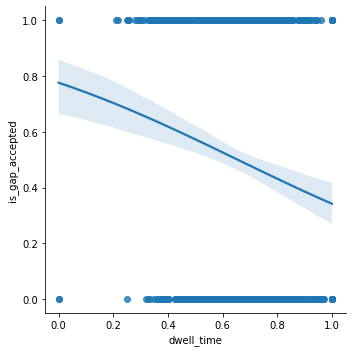

In [33]:
data = measures[(measures.d_condition==30)&(measures.tta_condition==4)&(measures.tta_or_condition==4)]
data["dwell_q"] = pd.qcut(data.dwell_time, 10, labels=False)
sns.lmplot(data=data, x="dwell_time", y="is_gap_accepted", logistic=True)

# Model exploration

In [ ]:
duration = 4
# In a typical trial, participants looked
# 1) at the on-ramp for a short time - 300 ms
# 2) at the mirror for 700 ms
# 3) back at the on-ramp for the rest of the trial
# gaze_sample_typical =

In [ ]:
def get_trace(t, dt, tta, d, model_params):
    noise = np.random.randn(len(t))
    drift = model_params["alpha"]*(tta+ model_params["beta"]*d - model_params["theta"])
    dx = drift * simulation_params["dt"] +  model_params["noise"] * noise * np.sqrt(simulation_params["dt"])
    x = np.append([0], np.cumsum(dx)[:-1])
    boundary = model_params["b_0"]/(1+np.exp(-model_params["k"]*(tta-model_params["tta_crit"])))
    response_time_idx = np.where(abs(x)>boundary)
    if len(response_time_idx[0])>0:
        return(x[:response_time_idx[0][0]+1])
    else:
        return(x)

def generate_model_traces(t, dt, tta, d, model_params):
    is_two_correct = False
    is_rt_ok = False
    while not(is_two_correct) or not(is_rt_ok):
        trials = [get_trace(t, dt, tta, d, model_params) for i in range(3)]
        is_two_correct = (np.sum([1 if x[-1]>0 else 0 for x in trials]) == 2)
        rts = [model_params["ndt_location"]+len(trial)*dt for trial in trials]
        is_rt_ok = all([(rt>0.4) & (rt<0.7) for rt in rts])
    pd.DataFrame(trials).to_csv("ddm_traces.csv")

def plot_model_traces(model_params, simulation_params, generate_new=False):
    colors = {"go": "#4052ac", "stay": "#e6263d", "equation": "#50596A"}
    condition = {"tta": 6, "d": 120}
    dt = simulation_params["dt"]
    t = np.arange(0, simulation_params["duration"], dt)
    d = condition["d"] - (condition["d"] / condition["tta"])*t
    tta = condition["tta"] - t
    ndt = model_params["ndt_location"]

    if generate_new:
        generate_model_traces(t, dt, tta, d, model_params)
    trials = [x[1][~x[1].isna()].values[1:] for x in pd.read_csv("ddm_traces.csv").iterrows()]

    fig, (ax_rate, ax) = plt.subplots(2, 1, figsize=(8,6), gridspec_kw={"height_ratios": [1, 3]}, dpi=150, sharex=True)

    for x in trials:
        color = colors["go"] if x[-1]>0 else colors["stay"]
        ax.plot(t[:len(x)]+ndt, x, lw=1.0, alpha=0.4, color=color)
        ax.plot(t[len(x)]+ndt, x[-1], ls="", alpha=0.8, marker="o", ms=4, color=color)

    for tta_condition in [4, 6]:
        boundary = model_params["b_0"]/(1+np.exp(-model_params["k"]*(tta_condition-t-model_params["tta_crit"])))
        ax.plot(t+ndt, boundary, ls="--", color="gray", alpha=0.6)
        ax.plot(t+ndt, -boundary, ls="--", color="gray", alpha=0.6)
        ax.text(0.78, 0.3+0.15*(tta_condition-4), r"TTA$|_{t=0}$=%is" % (tta_condition),
                color=colors["equation"], alpha=0.6, fontsize=16)

    sns.despine(offset=2, trim=True)
    plt.tight_layout()

# all_subj_params = model_params[model_params.subj_id=="all"].to_dict("records")[0]
all_subj_params = {"dt": 0.0001, "duration": 1}
all_subj_params["ndt_location"] -= 0.1
all_subj_params["theta"] += 0.5
simulation_params = {"dt": 0.0001, "duration": 1}

plot_model_traces(all_subj_params, simulation_params, generate_new=False)